Sentiment Analyzer Project
Selected Product: Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Number of rows (reviews): 1451


Word		Polarity	Sentiment
----------------------------------------
happy       	0.800		Positive
exciting    	0.300		Positive
good        	0.700		Positive
rich        	0.375		Positive
smile       	0.300		Positive
sad         	-0.500		Negative
disappointed	-0.750		Negative
bad         	-0.700		Negative
poor        	-0.400		Negative
anger       	-0.700		Negative
food        	0.000		Neutral
animal      	0.000		Neutral

Product name: Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)
Number of rows: 1451
Number of columns: 6
Shortest review length: 2
Longest review length: 1465
Average review length: 107.68508287292818

Sample with sentiment:
                                                    name Brand Name  Price  \
16429  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   
16

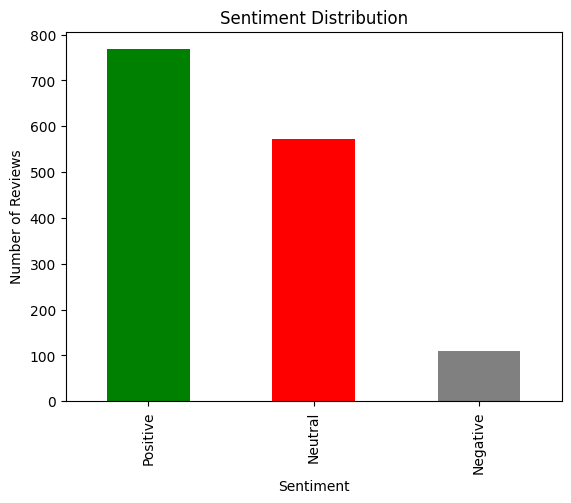

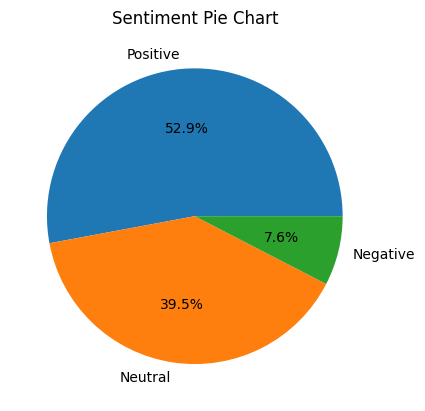


Positive Examples:
                                                    name Brand Name  Price  \
16429  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   
16430  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   
16433  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   

       rating                reviews  review_votes Sentiment  
16429       5               good buy           0.0  Positive  
16430       5  great phonegood price           0.0  Positive  
16433       5              very good           0.0  Positive  

Negative Examples:
                                                    name Brand Name  Price  \
16437  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   
16446  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   
16462  Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...        NaN  99.99   

       rating                                            reviews  \
16437       1 

In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

print("Sentiment Analyzer Project")

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
data = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv", encoding="latin1")

#choose a product with more than 1000 review
chosen_name = "Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)"


# Filter dataset by this product name
product = data[data["Product Name"] == chosen_name].copy()
print("Selected Product:", chosen_name)
print("Number of rows (reviews):", len(product))
print("\n")

# Rename columns to cleaner names
product = product.rename(columns={
"Product Name": "name",
"Brand Nam": "brand",
"Pric": "price",
"Rating": "rating",
"Reviews": "reviews",
"Review Votes": "review_votes"
})

# -----------------------------------------
# TASK 1 — SENTIMENT ANALYZER FUNCTION
# -----------------------------------------
def sentimentAnalyzer(text):
  blob = TextBlob(str(text))
  score = blob.sentiment.polarity

  if score < -0.2:
    return "Negative"
  elif score > 0.2:
    return "Positive"
  else:
    return "Neutral"

# -----------------------------------------
# TASK 2 — Verify Sentiment Function
# -----------------------------------------

test_words = [
    "happy", "exciting", "good", "rich", "smile",
    "sad", "disappointed", "bad", "poor", "anger",
    "food", "animal"
]

print("Word\t\tPolarity\tSentiment")
print("-" * 40)

for word in test_words:
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    sentiment = sentimentAnalyzer(word)

    print(f"{word:<12}\t{polarity:.3f}\t\t{sentiment}")

# -----------------------------------------
# TASK 3 — BASIC DATA INFO
# -----------------------------------------
print("\nProduct name:", chosen_name)
print("Number of rows:", len(product))
print("Number of columns:", len(product.columns))

review_lengths = product["reviews"].dropna().apply(len)

print("Shortest review length:", review_lengths.min())
print("Longest review length:", review_lengths.max())
print("Average review length:", review_lengths.mean())

# -----------------------------------------
# TASK 4 — Apply Sentiment Function
# -----------------------------------------
product["Sentiment"] = product["reviews"].apply(sentimentAnalyzer)

print("\nSample with sentiment:")
print(product.head())

# -----------------------------------------
# TASK 5 — Visualization
# -----------------------------------------
sent_counts = product["Sentiment"].value_counts()

# Bar chart
sent_counts.plot(kind="bar", color=["green","red","gray"])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.show()

# Pie chart
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Pie Chart")
plt.show()

# Examples
print("\nPositive Examples:")
print(product[product["Sentiment"]=="Positive"].head(3))

print("\nNegative Examples:")
print(product[product["Sentiment"]=="Negative"].head(3))

print("\nNeutral Examples:")
print(product[product["Sentiment"]=="Neutral"].head(3))

# False positives/negatives using rating
product["polarity"] = product["reviews"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

false_negative = product[(product["rating"] >= 4) & (product["Sentiment"] == "Negative")]
false_positive = product[(product["rating"] <= 2) & (product["Sentiment"] == "Positive")]

print("\nFalse Negatives:", len(false_negative))
print("False Positives:", len(false_positive))

# -----------------------------------------
# EXPORT TO CSV (TASK 6)
# -----------------------------------------
product.to_csv("Product_Sentiment_Analysis.csv", index=False)
print("\nCSV Exported Successfully!")